In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import plotly.express as px

In [3]:
#reading the csv file
df=pd.read_csv(r"C:\Users\bhagy\Desktop\titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#total rows & columns
df.shape

(418, 12)

In [10]:
#getting to know the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [11]:
#describing the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


DATA CLEANING

In [12]:
#Finding the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
#finding the duplicate
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [21]:
#dropping the 'cabin' column as therewer many missing values
df.drop(['Cabin'],axis=1,inplace=True)

In [24]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [25]:
#checking as no null is left
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

DATA ANALYSIS

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [35]:
# People who survived during the incident
(df['Survived']== 1).sum()
print('the people who survived is:',(df['Survived']==1).sum())

(df['Survived']== 0).sum()
print('the people who died is:',(df['Survived']== 0).sum())

the people who survived is: 152
the people who died is: 266


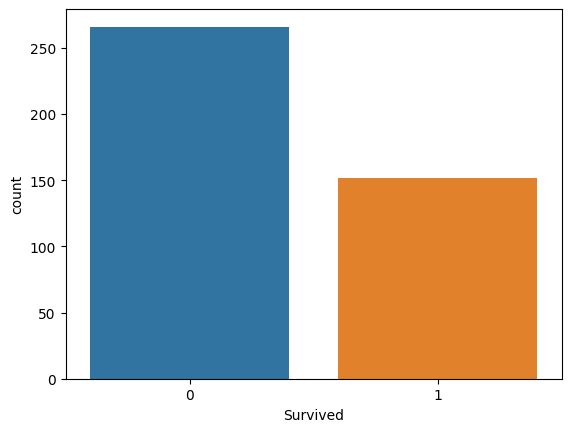

In [55]:
sns.countplot(x='Survived',data=df)
plt.xlabel=('Number of people')
plt.ylabel=('No of people')


In [58]:
df['Pclass'].unique()

array([3, 2, 1], dtype=int64)

In [61]:
#Value count Pclass
df['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

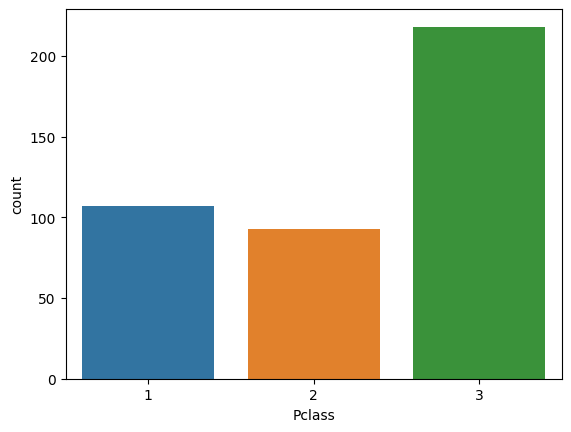

In [60]:
#count of Pclass
sns.countplot(x='Pclass',data=df)


In [63]:
#Males age between 22 to 30
df[(df['Sex']=='male')&(df['Age'].between(22,30))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
27,919,0,3,"Daher, Mr. Shedid",male,22.5,0,0,2698,7.2250,C
31,923,0,2,"Jefferys, Mr. Clifford Thomas",male,24.0,2,0,C.A. 31029,31.5000,S
34,926,0,1,"Mock, Mr. Philipp Edmund",male,30.0,1,0,13236,57.7500,C
...,...,...,...,...,...,...,...,...,...,...,...
390,1282,0,1,"Payne, Mr. Vivian Ponsonby",male,23.0,0,0,12749,93.5000,S
394,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,S
396,1288,0,3,"Colbert, Mr. Patrick",male,24.0,0,0,371109,7.2500,Q
398,1290,0,3,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,347065,7.7750,S


<Axes: xlabel='Sex', ylabel='count'>

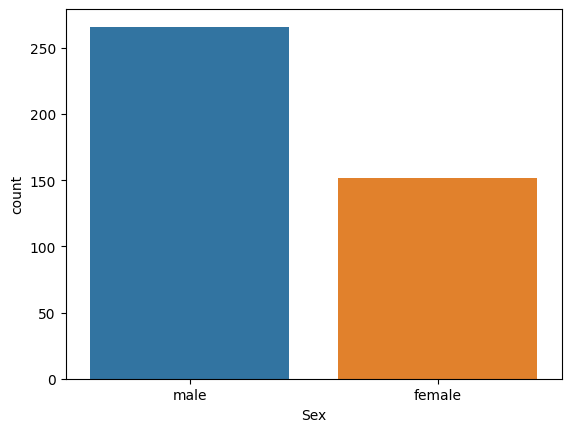

In [64]:
#count as per sex
sns.countplot(x=df['Sex'],data=df)

C:\Users\bhagy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Age', ylabel='Density'>

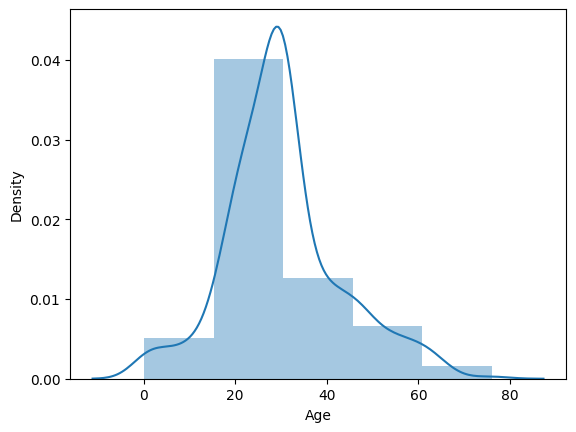

In [65]:
sns.distplot(df['Age'],bins=5)

(array([ 16.,  16.,  71., 183.,  43.,  37.,  25.,  17.,   9.,   1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

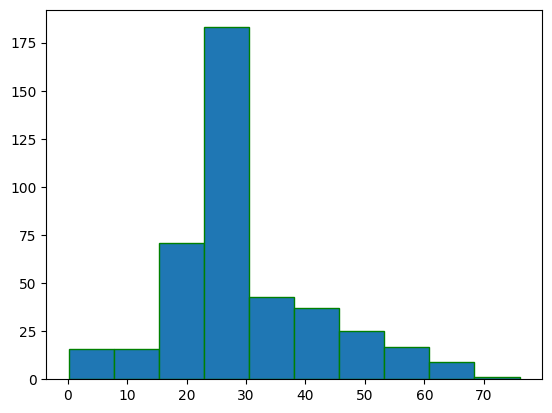

In [72]:
#histogram showing the max age people in the ship
plt.hist(x="Age",data=df,edgecolor='green')

<Axes: xlabel='Sex', ylabel='Survived'>

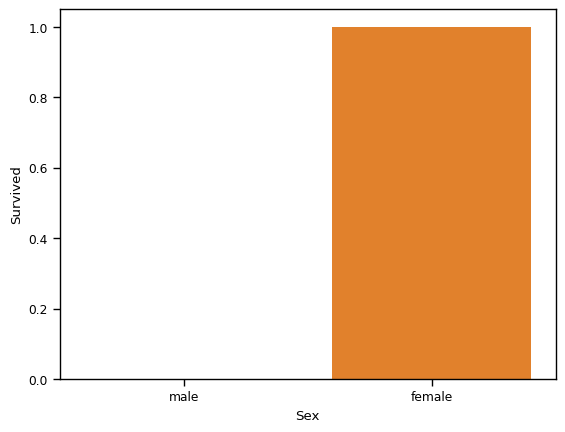

In [79]:
#sex wise Survived
sns.barplot(x='Sex',y='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

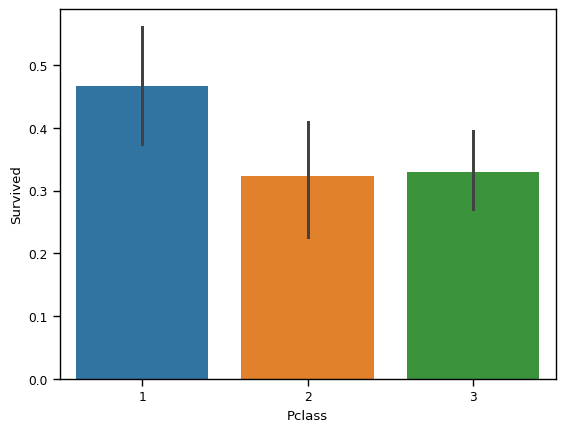

In [81]:
#pclass who survived
sns.barplot(x='Pclass',y='Survived',data=df)

In [82]:
df.groupby('Pclass')['Survived'].sum()

Pclass
1    50
2    30
3    72
Name: Survived, dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

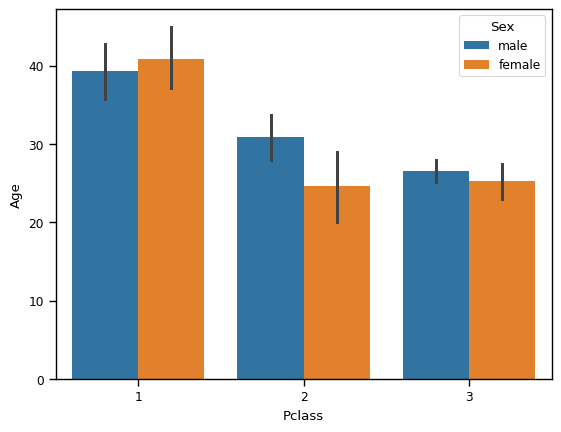

In [85]:
#Pclass acording to age
sns.barplot(x='Pclass',y="Age",data=df,hue='Sex')

<Axes: xlabel='Embarked', ylabel='Fare'>

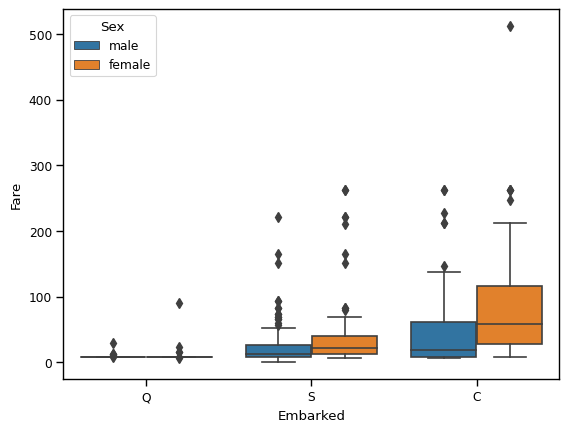

In [88]:
#relating the emabared and Fare Relation according to sex
sns.boxplot(x='Embarked',y='Fare',hue='Sex',data=df,dodge=True)


In [89]:

df['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [90]:
#total siblings/Spouse
df['SibSp'].sum()

187

In [91]:
#finding the Total Sibling/spouses across diff Pclass
df.groupby('Pclass')['SibSp'].sum()

Pclass
1     51
2     35
3    101
Name: SibSp, dtype: int64

In [105]:
#survived number as per sex
df.groupby('Sex')['Survived'].sum()

Sex
female    152
male        0
Name: Survived, dtype: int64